In [1]:
import pandas as pd
import lifelines
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv(
    "/Users/paniket/TU_Eindhoven/2_Study/Q1_2AMS11_survival_Statistics_for_Data_Scientists/2_Assignments/group/Group_54_2AMS11_Assignment/output/cleaned_df_with_status_0_or_1.csv"
)

df_pets = df[df["pets"] == 1]
df_no_pets = df[df["pets"] == 0]

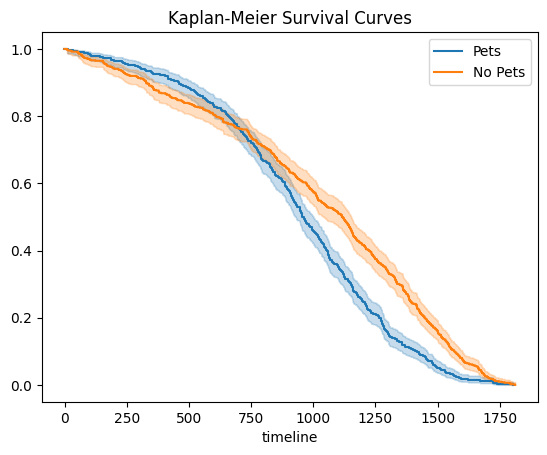

In [3]:
kmf = KaplanMeierFitter()
kmf.fit(df_pets["time_to_failure"], event_observed=df_pets["had_failure"], label="Pets")
kmf.plot_survival_function()

kmf.fit(
    df_no_pets["time_to_failure"],
    event_observed=df_no_pets["had_failure"],
    label="No Pets",
)
kmf.plot_survival_function()

plt.title("Kaplan-Meier Survival Curves")
plt.show()

In [4]:
df

,registration_date,total_usage_time,pets,carpet_score,sent_for_repair,failure_date,battery_status,impact_status,ir_status,had_failure,time_to_failure,type_of_failure
0,2015-01-01,262,0,1,1,2015-10-23,0,0,1,1,295,Ir
1,2015-01-01,2003,0,2,1,2019-12-18,0,0,0,1,1812,Unknown_Component
2,2015-01-01,2454,1,4,1,2018-11-28,1,1,0,1,1427,Battery_and_Impact
3,2015-01-01,987,0,2,0,1970-01-01,0,0,0,0,-1,Censored
4,2015-01-02,1472,0,1,1,2019-12-07,1,0,0,1,1800,Battery
...,...,...,...,...,...,...,...,...,...,...,...,...
5382,2019-12-30,1,0,5,0,1970-01-01,0,0,0,0,-1,Censored
5383,2019-12-30,1,0,1,0,1970-01-01,0,0,0,0,-1,Censored
5384,2019-12-31,0,1,1,0,1970-01-01,0,0,0,0,-1,Censored
5385,2019-12-31,0,0,3,0,1970-01-01,0,0,0,0,-1,Censored


In [5]:
df.columns

Index(['registration_date', 'total_usage_time', 'pets', 'carpet_score',
       'sent_for_repair', 'failure_date', 'battery_status', 'impact_status',
       'ir_status', 'had_failure', 'time_to_failure', 'type_of_failure'],
      dtype='object')

In [6]:
dfx = df[
    [
        "total_usage_time",
        "pets",
        "carpet_score",
        "battery_status",
        "impact_status",
        "ir_status",
        "had_failure",
        "time_to_failure",
    ]
]

In [7]:

cph = CoxPHFitter()
cph.fit(dfx, duration_col="time_to_failure", event_col="had_failure")
cph.print_summary()
cph.check_assumptions(dfx, p_value_threshold=0.05)

<lifelines.CoxPHFitter: fitted with 5387 total observations, 4166 right-censored observations>
             duration col = 'time_to_failure'
                event col = 'had_failure'
      baseline estimation = breslow
   number of observations = 5387
number of events observed = 1221
   partial log-likelihood = -7025.31
         time fit was run = 2024-10-20 18:54:04 UTC

---
                  coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                         
total_usage_time -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
pets              1.45      4.27      0.07            1.31            1.59                3.71                4.90
carpet_score      0.04      1.04      0.02           -0.01            0.08                0.99                1.08
battery_status    1.02      2.77      0.15            0.73            1.31                2.08                3.71
impact_status     1.45      4.25      0.17            1.11            1.79                3.03                5.98
ir_status         2.17      8.75      0.16            1.85            2.49                6.38               12.01

                  cmp to      z      p  -log2(p)
covariate                                       
total_usage_time    0.00 -21.23 <0.005    329.77
pets                0.00  20.43 <0.005    305.63
carpet_score        0.00   1.65   0.10      3.34
battery_status      0.00   6.89 <0.005     37.37
impact_status       0.00   8.35 <0.005     53.69
ir_status           0.00  13.44 <0.005    134.38
---
Concordance = 0.79
Partial AIC = 14062.62
log-likelihood ratio test = 872.66 on 6 df
-log2(p) of ll-ratio test = 612.95

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 5387 total observations, 4166 right-censored observations>
         test_name = proportional_hazard_test

---
                       test_statistic      p  -log2(p)
battery_status   km             22.01 <0.005     18.49
                 rank           22.03 <0.005     18.51
carpet_score     km              0.57   0.45      1.15
                 rank            0.57   0.45      1.15
impact_status    km             48.77 <0.005     38.34
                 rank           48.80 <0.005     38.36
ir_status        km             35.12 <0.005     28.27
                 rank           35.13 <0.005     28.27
pets             km             59.71 <0.005     46.37
                 rank           59.77 <0.005     46.42
total_usage_time km            248.77 <0.005    183.76
                 rank          248.68 <0.005    183.70



1. Variable 'total_usage_time' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'total_usage_time' might be incorrect. That is,
there may be non-linear terms missing. The proportional hazard test used is very sensitive to
incorrect functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'total_usage_time' using pd.cut, and then specify it in
`strata=['total_usage_time', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'pets' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['pets', ...]` in the call in
`.fit`. See documentation in link [E] below.

3. Variable 'battery_status' failed the non-proportional test: p-value is <5e-05.

   Advice: with so 

[]